# Clustering script for WebOmics

In [2]:
import os
import glob

import pylab as plt
import matplotlib
from IPython.display import display, HTML

import numpy as np
from scipy.sparse import lil_matrix
import pandas as pd
from pandas import HDFStore

import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial import distance
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn import preprocessing

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

%matplotlib inline

In [5]:
time = 7
parasite = 'INFEC'
treatment = 'Unsorted'

basedir = 'C:/Users/joewa/Dropbox/Analysis/omics_integration/data'
filename = os.path.join(basedir, 'data_%d_%s_%s.h5' % (time, parasite, treatment))
hdf = HDFStore(filename, complevel=9, complib='bzip2')

c:\users\joewa\.virtualenvs\web_omics-mv1eiydh\lib\site-packages\tables\filters.py:331: FiltersWarning: compression library ``bzip2`` is not available; using ``zlib`` instead
  % (complib, default_complib), FiltersWarning)


In [6]:
hdf['peak_vs_transcript']

HDF5ExtError: HDF5 error back trace

  File "C:\ci\hdf5_1525883541467\work\src\H5Dio.c", line 216, in H5Dread
    can't read data
  File "C:\ci\hdf5_1525883541467\work\src\H5Dio.c", line 587, in H5D__read
    can't read data
  File "C:\ci\hdf5_1525883541467\work\src\H5Dchunk.c", line 2304, in H5D__chunk_read
    unable to read raw data chunk
  File "C:\ci\hdf5_1525883541467\work\src\H5Dchunk.c", line 3659, in H5D__chunk_lock
    data pipeline read failed
  File "C:\ci\hdf5_1525883541467\work\src\H5Z.c", line 1254, in H5Z_pipeline
    required filter 'bzip2' is not registered
  File "C:\ci\hdf5_1525883541467\work\src\H5PLint.c", line 270, in H5PL_load
    search in path table failed
  File "C:\ci\hdf5_1525883541467\work\src\H5PLpath.c", line 604, in H5PL__find_plugin_in_path_table
    search in path C:\ProgramData\hdf5\lib\plugin encountered an error
  File "C:\ci\hdf5_1525883541467\work\src\H5PLpath.c", line 734, in H5PL__find_plugin_in_path
    can't open directory

End of HDF5 error back trace

Problems reading the array data.

In [4]:
pvt = hdf['peak_vs_transcript'].replace([np.inf, -np.inf], np.nan).fillna(0)
# pvp = hdf['peak_vs_peak']
# tvt = hdf['transcript_vs_transcript']

hdf.close()

c:\users\joewa\.virtualenvs\web_omics-mv1eiydh\lib\site-packages\tables\filters.py:331: FiltersWarning: compression library ``bzip2`` is not available; using ``zlib`` instead
  % (complib, default_complib), FiltersWarning)


HDF5ExtError: HDF5 error back trace

  File "C:\ci\hdf5_1525883541467\work\src\H5Dio.c", line 216, in H5Dread
    can't read data
  File "C:\ci\hdf5_1525883541467\work\src\H5Dio.c", line 587, in H5D__read
    can't read data
  File "C:\ci\hdf5_1525883541467\work\src\H5Dchunk.c", line 2304, in H5D__chunk_read
    unable to read raw data chunk
  File "C:\ci\hdf5_1525883541467\work\src\H5Dchunk.c", line 3659, in H5D__chunk_lock
    data pipeline read failed
  File "C:\ci\hdf5_1525883541467\work\src\H5Z.c", line 1254, in H5Z_pipeline
    required filter 'bzip2' is not registered
  File "C:\ci\hdf5_1525883541467\work\src\H5PLint.c", line 270, in H5PL_load
    search in path table failed
  File "C:\ci\hdf5_1525883541467\work\src\H5PLpath.c", line 604, in H5PL__find_plugin_in_path_table
    search in path C:\ProgramData\hdf5\lib\plugin encountered an error
  File "C:\ci\hdf5_1525883541467\work\src\H5PLpath.c", line 734, in H5PL__find_plugin_in_path
    can't open directory

End of HDF5 error back trace

Problems reading the array data.

In [3]:
pvt.isnull().values.any()

False

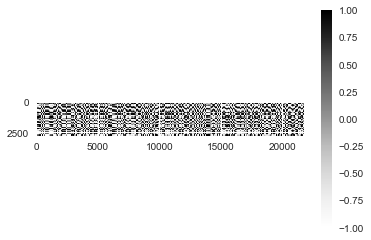

In [4]:
plt.imshow(pvt)
plt.colorbar()

In [5]:
# https://stackoverflow.com/questions/10204173/plotting-dendrogram-in-scipy-error-for-large-dataset

import sys
sys.setrecursionlimit(10000)

In [6]:
row_linkage = hierarchy.linkage(
    distance.pdist(pvt), method='average')

In [7]:
col_linkage = hierarchy.linkage(
    distance.pdist(pvt.T), method='average')

/Users/joewandy/anaconda/envs/neural_net/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


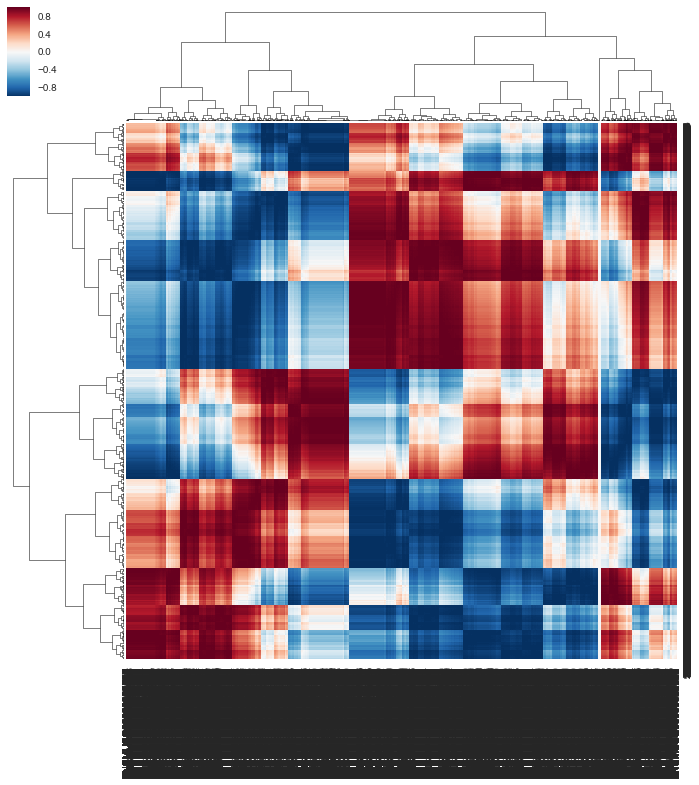

In [11]:
g = sns.clustermap(pvt, row_linkage=row_linkage, col_linkage=col_linkage, 
               method="average", figsize=(12, 12))

In [9]:
Z = row_linkage

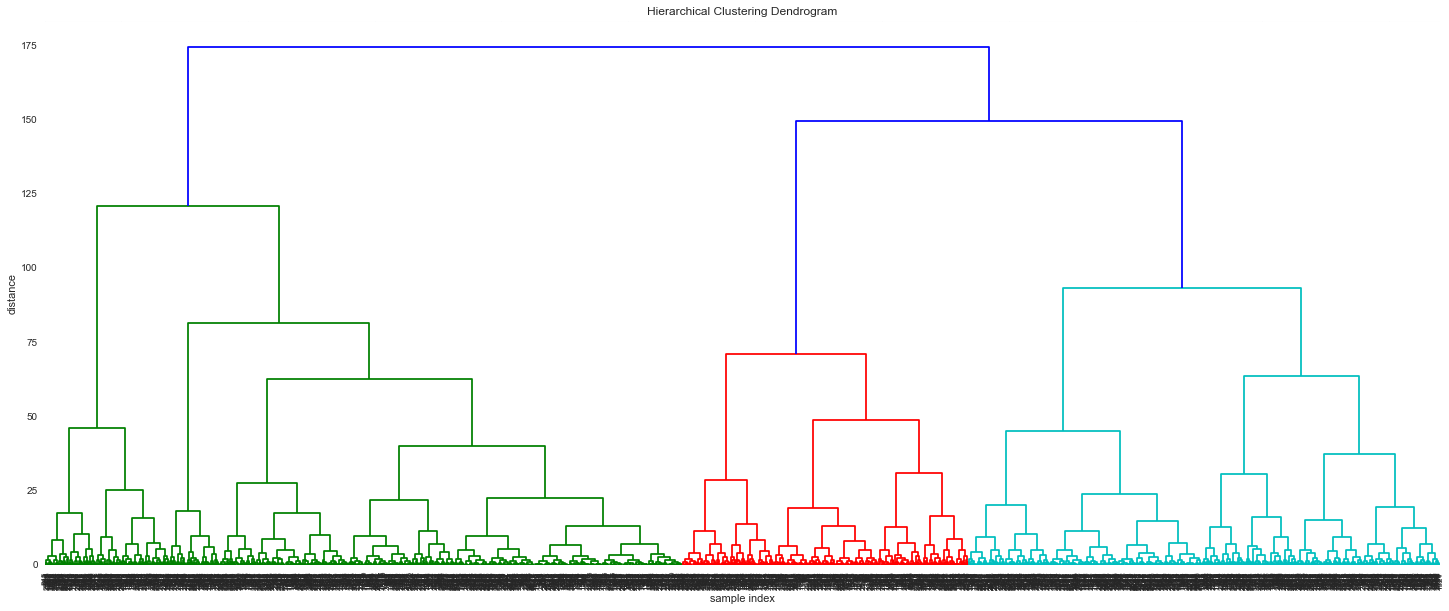

In [10]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

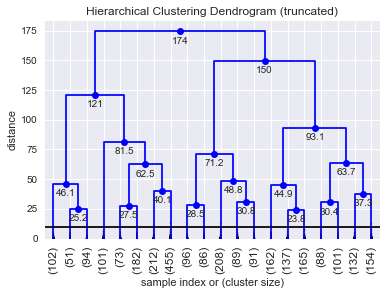

In [12]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

max_d = 10
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    max_d=max_d,
)
plt.show()

In [13]:
clusters = fcluster(Z, max_d, criterion='distance')

print clusters
print clusters.shape
print max(clusters)

[13 17 14 ..., 42 36 19]
(2779,)
45


### Useless

Not enough samples

In [14]:
pca = PCA(n_components = 10)
transformed = pca.fit_transform(pvt)
evr = pca.explained_variance_ratio_
print evr
print 'Explained variations -- first two PCs: %4f' % (evr[0] + evr[1])
print 'Explained variations -- all components: %.4f' % np.sum(evr)

[  6.27291730e-01   3.72708270e-01   4.30000028e-27   1.23127958e-27
   7.43568384e-28   6.00606469e-28   3.16770190e-28   2.60513532e-28
   2.21564661e-28   1.77351595e-28]
Explained variations -- first two PCs: 1.000000
Explained variations -- all components: 1.0000


In [15]:
# tsne = TSNE(n_components=2, method='exact')
# transformed = tsne.fit_transform(pvt)

In [16]:
# plt.figure(figsize=(12, 12))
# plt.scatter(transformed[:, 0], transformed[:, 1], marker='.', alpha=0.1, color='gray')

### Load pathway data from KEGG

In [17]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [18]:
robjects.r['load']('../data/pathway/pathways2Compounds.RData')

R object with classes: ('character',) mapped to:
<StrVector - Python:0x1754a6f80 / R:0x7fdf85876188>
[str]

In [19]:
a = robjects.r['pathways2Compounds']
pathway_compounds = dict(zip(a.names, map(list,list(a))))

print pathway_compounds.keys()[0:10]

['path:map00312', 'path:map04730', 'path:map00310', 'path:map00311', 'path:map00253', 'path:map00250', 'path:map00254', 'path:map00380', 'path:map05120', 'path:map00770']


In [20]:
print pathway_compounds['path:map00010']

['Pyruvate', 'Acetyl-CoA', 'D-Glucose', 'Acetate', 'Oxaloacetate', 'Thiamin diphosphate', 'Phosphoenolpyruvate', 'Acetaldehyde', 'D-Glucose 1-phosphate', 'Glycerone phosphate', 'D-Glyceraldehyde 3-phosphate', '(S)-Lactate', '3-Phospho-D-glycerate', 'beta-D-Glucose', '3-Phospho-D-glyceroyl phosphate', 'alpha-D-Glucose', 'Ethanol', '2-Phospho-D-glycerate', 'alpha-D-Glucose 6-phosphate', '2,3-Bisphospho-D-glycerate', 'beta-D-Glucose 6-phosphate', 'Salicin', '2-(alpha-Hydroxyethyl)thiamine diphosphate', 'beta-D-Fructose 6-phosphate', 'beta-D-Fructose 1,6-bisphosphate', 'Arbutin', 'Arbutin 6-phosphate', 'Salicin 6-phosphate', 'Enzyme N6-(lipoyl)lysine', 'Enzyme N6-(dihydrolipoyl)lysine', '[Dihydrolipoyllysine-residue acetyltransferase] S-acetyldihydrolipoyllysine']


In [21]:
robjects.r['load']('../data/pathway/pathways.RData')

R object with classes: ('character',) mapped to:
<StrVector - Python:0x172f3def0 / R:0x7fdfa0de2e28>
[str]

In [22]:
df = robjects.r['pathways']

In [23]:
pathway_names = {}
for ix, row in df.iterrows():
    pathway_names[row['id']] = row['name']

In [24]:
pathway_names

{'path:map00010': 'Glycolysis / Gluconeogenesis',
 'path:map00020': 'Citrate cycle (TCA cycle)',
 'path:map00030': 'Pentose phosphate pathway',
 'path:map00040': 'Pentose and glucuronate interconversions',
 'path:map00051': 'Fructose and mannose metabolism',
 'path:map00052': 'Galactose metabolism',
 'path:map00053': 'Ascorbate and aldarate metabolism',
 'path:map00061': 'Fatty acid biosynthesis',
 'path:map00062': 'Fatty acid elongation',
 'path:map00071': 'Fatty acid degradation',
 'path:map00072': 'Synthesis and degradation of ketone bodies',
 'path:map00073': 'Cutin, suberine and wax biosynthesis',
 'path:map00100': 'Steroid biosynthesis',
 'path:map00120': 'Primary bile acid biosynthesis',
 'path:map00121': 'Secondary bile acid biosynthesis',
 'path:map00130': 'Ubiquinone and other terpenoid-quinone biosynthesis',
 'path:map00140': 'Steroid hormone biosynthesis',
 'path:map00190': 'Oxidative phosphorylation',
 'path:map00195': 'Photosynthesis',
 'path:map00230': 'Purine metabolism